#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Final Project. Apple</span>

---

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from datetime import datetime, timedelta
import re
import pandas as pd
import time
from datetime import timezone

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Data Extraction</span>
### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 1.1 YouTube Comments</span>

In [2]:
# Parse relative date
def parse_relative_date(relative_str):
    now = datetime.now()
    relative_str = relative_str.strip().lower()

    traductions = {
        "segundo": "second",
        "minuto": "minute",
        "hora": "hour",
        "día": "day",
        "dias": "day",
        "semana": "week",
        "mes": "month",
        "año": "year",
        "semanas": "weeks",
        "meses": "months",
        "años": "years"
    }

    if "hace" in relative_str:
        match = re.match(r"hace\s+(\d+)\s+(\w+)", relative_str)
        if match:
            quantity = int(match.group(1))
            unit_es = match.group(2)
            unit_en = traductions.get(unit_es, "")
            relative_str = f"{quantity} {unit_en} ago"

    match = re.match(r"(\d+)\s+(second|minute|hour|day|week|month|year)s?\s+ago", relative_str)
    if not match:
        return relative_str 
    quantity = int(match.group(1))
    unit = match.group(2)
    days = {
        "second": 0, "minute": 0, "hour": 0,
        "day": 1, "week": 7, "month": 30, "year": 365
    }.get(unit, 0) * quantity
    return (now - timedelta(days=days)).strftime("%Y-%m-%d")

In [4]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=qF4vZxbSmjo"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_iphone16e_MKBHD_youtube = pd.DataFrame(comments_data)
comments_iphone16e_MKBHD_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_iphone16e_MKBHD_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_iphone16e_MKBHD_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 60 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 140 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 160 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 180 comments
[Scroll 28] Loaded 200 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 200 comments
[Scroll 31] Loaded 220 comments
[Scroll 32] Loaded 220 commen

In [ ]:
comments_iphone16e_MKBHD_youtube

,date,text
0,2025-02-25,It’s like this phone isn’t even designed to be...
1,2025-02-25,The intro summarised everything perfectly.
2,2025-02-25,"That intro / outro was spot-on. ""Who ARE you?"""
3,2025-03-06,Im still on an iPhone 11 Pro Max. It refuses t...
4,2025-02-25,All they had to do was not remove magsafe and ...
...,...,...
635,2025-03-06,Iphone 16e is an Apple ecosystem primary basic...
636,5 ago,You can't suggest it to people but you can giv...
637,2025-03-06,I still love that phone personally
638,2025-03-06,LMAO...my 13 mini just became a premium device...


In [ ]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=rhI3fgw2pGE"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_iphone16e_iJustine_youtube = pd.DataFrame(comments_data)
comments_iphone16e_iJustine_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_iphone16e_iJustine_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_iphone16e_iJustine_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 60 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 80 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 100 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 120 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 140 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 160 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 180 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 200 comments
[Scroll 28] Loaded 200 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 220 comments
[Scroll 31] Loaded 220 comments
[Scroll 32] Loaded 220 comme

In [ ]:
comments_iphone16e_iJustine_youtube

,date,text
0,2025-03-06,"When creators say ""This is really interesting""..."
1,2025-02-25,If they dropped it down to $499 they might hav...
2,2025-02-25,"this is not a review, this is an ad."
3,2025-02-25,Tim Cook should employ iJustine.
4,2025-02-25,Have all the negative points been forgotten? T...
...,...,...
462,2025-02-25,First
463,2025-03-06,It's god
464,2025-03-06,It's like no one wactched the whole video. Ju...
465,2025-02-25,I’m good with my 16 pro max


In [ ]:
comments_iphone16e_MKBHD_youtube.to_csv("data/comments_iphone16e_MKBHD_youtube.csv", index=False)
comments_iphone16e_iJustine_youtube.to_csv("data/comments_iphone16e_iJustine_youtube.csv", index=False)

In [ ]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=f3DfJxvkN-8"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_airpodspro2_MKBHD_youtube = pd.DataFrame(comments_data)
comments_airpodspro2_MKBHD_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_airpodspro2_MKBHD_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_airpodspro2_MKBHD_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 20 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 40 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 60 comments
[Scroll 11] Loaded 60 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 80 comments
[Scroll 14] Loaded 80 comments
[Scroll 15] Loaded 80 comments
[Scroll 16] Loaded 100 comments
[Scroll 17] Loaded 100 comments
[Scroll 18] Loaded 100 comments
[Scroll 19] Loaded 120 comments
[Scroll 20] Loaded 120 comments
[Scroll 21] Loaded 120 comments
[Scroll 22] Loaded 120 comments
[Scroll 23] Loaded 140 comments
[Scroll 24] Loaded 140 comments
[Scroll 25] Loaded 140 comments
[Scroll 26] Loaded 140 comments
[Scroll 27] Loaded 160 comments
[Scroll 28] Loaded 160 comments
[Scroll 29] Loaded 160 comments
[Scroll 30] Loaded 160 comments
[Scroll 31] Loaded 180 comments
[Scroll 32] Loaded 180 comments


In [ ]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=VixPhOj2DG8"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_airpodspro2_iJustine_youtube = pd.DataFrame(comments_data)
comments_airpodspro2_iJustine_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_airpodspro2_iJustine_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_airpodspro2_iJustine_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 60 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 80 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 140 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 160 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 180 comments
[Scroll 28] Loaded 200 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 200 comments
[Scroll 31] Loaded 220 comments
[Scroll 32] Loaded 220 commen

In [ ]:
comments_airpodspro2_MKBHD_youtube.to_csv("data/raw/comments_airpodspro2_MKBHD_youtube.csv", index=False)
comments_airpodspro2_iJustine_youtube.to_csv("data/raw/comments_airpodspro2_iJustine_youtube.csv", index=False)

In [ ]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=t4ejFV6n4b8"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_macbookprom3_MKBHD_youtube = pd.DataFrame(comments_data)
comments_macbookprom3_MKBHD_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_macbookprom3_MKBHD_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_macbookprom3_MKBHD_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 60 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 80 comments
[Scroll 14] Loaded 80 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 100 comments
[Scroll 17] Loaded 100 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 120 comments
[Scroll 20] Loaded 120 comments
[Scroll 21] Loaded 120 comments
[Scroll 22] Loaded 140 comments
[Scroll 23] Loaded 140 comments
[Scroll 24] Loaded 140 comments
[Scroll 25] Loaded 140 comments
[Scroll 26] Loaded 160 comments
[Scroll 27] Loaded 160 comments
[Scroll 28] Loaded 160 comments
[Scroll 29] Loaded 180 comments
[Scroll 30] Loaded 180 comments
[Scroll 31] Loaded 180 comments
[Scroll 32] Loaded 200 comments

In [ ]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=1-MWXennMY4"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_macbookprom3_iJustine_youtube = pd.DataFrame(comments_data)
comments_macbookprom3_iJustine_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_macbookprom3_iJustine_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_macbookprom3_iJustine_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 60 comments
[Scroll 6] Loaded 60 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 80 comments
[Scroll 9] Loaded 80 comments
[Scroll 10] Loaded 100 comments
[Scroll 11] Loaded 100 comments
[Scroll 12] Loaded 100 comments
[Scroll 13] Loaded 120 comments
[Scroll 14] Loaded 120 comments
[Scroll 15] Loaded 140 comments
[Scroll 16] Loaded 140 comments
[Scroll 17] Loaded 140 comments
[Scroll 18] Loaded 160 comments
[Scroll 19] Loaded 160 comments
[Scroll 20] Loaded 160 comments
[Scroll 21] Loaded 180 comments
[Scroll 22] Loaded 180 comments
[Scroll 23] Loaded 200 comments
[Scroll 24] Loaded 200 comments
[Scroll 25] Loaded 200 comments
[Scroll 26] Loaded 220 comments
[Scroll 27] Loaded 220 comments
[Scroll 28] Loaded 220 comments
[Scroll 29] Loaded 240 comments
[Scroll 30] Loaded 240 comments
[Scroll 31] Loaded 240 comments
[Scroll 32] Loaded 260 com

In [ ]:
comments_macbookprom3_MKBHD_youtube.to_csv("data/raw/comment_macbookprom3_MKBHD_youtube.csv", index=False)
comments_macbookprom3_iJustine_youtube.to_csv("data/raw/comment_macbookprom3_iJustine_youtube.csv", index=False)

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 1.2 Reddit Reviews</span>

In [ ]:
import requests
import pandas as pd
from datetime import datetime

reddit_urls = [
    "https://www.reddit.com/r/LinusTechTips/comments/1itc5n3/thoughts_on_the_iphone_16e/",
    "https://www.reddit.com/r/iphone/comments/1j5f9ni/my_experience_with_the_new_iphone_16e_so_far_what/",
    "https://www.reddit.com/r/iphone/comments/1izpzkv/iphone_16e_review_eh_its_alright/",
    "https://www.reddit.com/r/ios/comments/1itt74w/the_iphone_16e_isnt_a_bad_phone_its_a_bad_value/",
    "https://www.reddit.com/r/iphone/comments/1ix5e5p/why_you_should_buy_the_16e/"
]

headers = {"User-agent": "Mozilla/5.0"}

def extract_comments(comments, collected=[]):
    for comment in comments:
        if comment["kind"] != "t1":
            continue
        c_data = comment["data"]
        text = c_data.get("body", "").strip()
        timestamp = datetime.fromtimestamp(c_data.get("created_utc", 0), tz=timezone.utc).strftime('%Y-%m-%d')
        if text:
            collected.append({"date": timestamp, "text": text})

        replies = c_data.get("replies")
        if replies and isinstance(replies, dict):
            extract_comments(replies["data"]["children"], collected)

    return collected

all_comments_combined = []

for url in reddit_urls:
    try:
        json_url = url.rstrip("/") + ".json"
        response = requests.get(json_url, headers=headers)
        response.raise_for_status()
        data = response.json()
        comments = extract_comments(data[1]["data"]["children"], [])
        all_comments_combined.extend(comments)
        print(f"Extracted {len(comments)} comments from: {url}")
    except Exception as e:
        print(f"Failed to fetch comments from {url}: {e}")

combined_df = pd.DataFrame(all_comments_combined)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_iphone16e_reddit.csv", index=False)

Extracted 190 comments from: https://www.reddit.com/r/LinusTechTips/comments/1itc5n3/thoughts_on_the_iphone_16e/
Extracted 124 comments from: https://www.reddit.com/r/iphone/comments/1j5f9ni/my_experience_with_the_new_iphone_16e_so_far_what/
Extracted 68 comments from: https://www.reddit.com/r/iphone/comments/1izpzkv/iphone_16e_review_eh_its_alright/
Extracted 157 comments from: https://www.reddit.com/r/ios/comments/1itt74w/the_iphone_16e_isnt_a_bad_phone_its_a_bad_value/
Extracted 100 comments from: https://www.reddit.com/r/iphone/comments/1ix5e5p/why_you_should_buy_the_16e/
         date                                               text
0  2025-02-19  Dissapointing. \n\n  \nIf it had magsafe and w...
1  2025-02-19  What’s so good about MagSafe? (My phone suppor...
2  2025-02-19  I use it in my car, it's the best phone mount ...
3  2025-02-19  Yeah that’s smart I’ve never thought of that b...
4  2025-02-20  Nothing is suitable for motorbikes, the heavy ...
Total unique Reddit comment

In [ ]:
import requests
import pandas as pd
from datetime import datetime

reddit_urls = [
    "https://www.reddit.com/r/AirpodsPro/comments/1gvjh7g/airpods_pro_2_longterm_review/",
    "https://www.reddit.com/r/airpods/comments/1h2rx1a/are_airpods_pro_2_worth_the_money/",
    "https://www.reddit.com/r/airpods/comments/1ckty46/airpods_pro_gen_2_really_worth_it/",
    "https://www.reddit.com/r/airpods/comments/1hdhx4s/should_i_buy_the_airpods_4_or_the_airpods_pro_2/"
]

headers = {"User-agent": "Mozilla/5.0"}

def extract_comments(comments, collected=[]):
    for comment in comments:
        if comment["kind"] != "t1":
            continue
        c_data = comment["data"]
        text = c_data.get("body", "").strip()
        timestamp = datetime.fromtimestamp(c_data.get("created_utc", 0), tz=timezone.utc).strftime('%Y-%m-%d')
        if text:
            collected.append({"date": timestamp, "text": text})

        replies = c_data.get("replies")
        if replies and isinstance(replies, dict):
            extract_comments(replies["data"]["children"], collected)

    return collected

all_comments_combined = []

for url in reddit_urls:
    try:
        json_url = url.rstrip("/") + ".json"
        response = requests.get(json_url, headers=headers)
        response.raise_for_status()
        data = response.json()
        comments = extract_comments(data[1]["data"]["children"], [])
        all_comments_combined.extend(comments)
        print(f"Extracted {len(comments)} comments from: {url}")
    except Exception as e:
        print(f"Failed to fetch comments from {url}: {e}")

combined_df = pd.DataFrame(all_comments_combined)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_airpodspro2_reddit.csv", index=False)

Extracted 185 comments from: https://www.reddit.com/r/AirpodsPro/comments/1gvjh7g/airpods_pro_2_longterm_review/
Extracted 171 comments from: https://www.reddit.com/r/airpods/comments/1h2rx1a/are_airpods_pro_2_worth_the_money/
Extracted 151 comments from: https://www.reddit.com/r/airpods/comments/1ckty46/airpods_pro_gen_2_really_worth_it/
Extracted 196 comments from: https://www.reddit.com/r/airpods/comments/1hdhx4s/should_i_buy_the_airpods_4_or_the_airpods_pro_2/
         date                                               text
0  2024-11-20  No, I’m skipping because this is legitimately ...
1  2024-11-20        My exact thoughts even the TLDR is too long
2  2024-11-20                                   Tiktok brainers.
3  2024-11-21                  Some things aren't worth reading.
4  2024-11-21  But are worth commenting. Tiktok brainers logi...
Total unique Reddit comments: 686


In [ ]:
import requests
import pandas as pd
from datetime import datetime

reddit_urls = [
    "https://www.reddit.com/r/macbookpro/comments/1gl1mu1/m3_macbook_pro_1_year_later/",
    "https://www.reddit.com/r/macbookpro/comments/1c8mh2x/is_the_macbook_pro_m3_pro_worth_it/",
    "https://www.reddit.com/r/macbookpro/comments/18x3cio/is_the_macbook_pro_m3_base_model_that_bad/",
    "https://www.reddit.com/r/macbookpro/comments/17k8g0v/thoughts_on_the_new_m3_macbook_pros/",
    "https://www.reddit.com/r/macbookpro/comments/1e7u7hw/do_not_buy_the_base_m3_mbp/"
]

headers = {"User-agent": "Mozilla/5.0"}

def extract_comments(comments, collected=[]):
    for comment in comments:
        if comment["kind"] != "t1":
            continue
        c_data = comment["data"]
        text = c_data.get("body", "").strip()
        timestamp = datetime.fromtimestamp(c_data.get("created_utc", 0), tz=timezone.utc).strftime('%Y-%m-%d')
        if text:
            collected.append({"date": timestamp, "text": text})

        replies = c_data.get("replies")
        if replies and isinstance(replies, dict):
            extract_comments(replies["data"]["children"], collected)

    return collected

all_comments_combined = []

for url in reddit_urls:
    try:
        json_url = url.rstrip("/") + ".json"
        response = requests.get(json_url, headers=headers)
        response.raise_for_status()
        data = response.json()
        comments = extract_comments(data[1]["data"]["children"], [])
        all_comments_combined.extend(comments)
        print(f"Extracted {len(comments)} comments from: {url}")
    except Exception as e:
        print(f"Failed to fetch comments from {url}: {e}")

combined_df = pd.DataFrame(all_comments_combined)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_macbookprom3_reddit.csv", index=False)

Extracted 130 comments from: https://www.reddit.com/r/macbookpro/comments/1gl1mu1/m3_macbook_pro_1_year_later/
Extracted 83 comments from: https://www.reddit.com/r/macbookpro/comments/1c8mh2x/is_the_macbook_pro_m3_pro_worth_it/
Extracted 49 comments from: https://www.reddit.com/r/macbookpro/comments/18x3cio/is_the_macbook_pro_m3_base_model_that_bad/
Extracted 197 comments from: https://www.reddit.com/r/macbookpro/comments/17k8g0v/thoughts_on_the_new_m3_macbook_pros/
Extracted 197 comments from: https://www.reddit.com/r/macbookpro/comments/1e7u7hw/do_not_buy_the_base_m3_mbp/
         date                                               text
0  2024-11-06  Looks very dated. I think you need to update t...
1  2024-11-06  light consider rob library screw lock exultant...
2  2024-11-06          People who do basic tasks get mba not mbp
3  2024-11-06             I do basic things and still got a mbp.
4  2024-11-07                                               Why?
Total unique Reddit comments:

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 2. Data Cleaning</span>

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_for_analysis(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"(u/|@)\w+", "", text)       # remove mentions
    text = re.sub(r"[^\w\s]", "", text)         # remove punctuation/special chars

    tokens = word_tokenize(text)
    filtered = [w for w in tokens if w not in stop_words and len(w) > 2]
    lemmatized = [lemmatizer.lemmatize(w) for w in filtered]
    return " ".join(lemmatized)

def clean_text_for_sentiment(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)        # remove URLs
    text = re.sub(r"(u/|@)\w+", "", text)             # remove mentions
    text = re.sub(r"\*|_|>|`", "", text)              # remove basic markdown
    return text.strip()

In [ ]:
dataframes = {
    "comments_iphone16e_MKBHD_youtube": pd.read_csv('data/raw/comments_iphone16e_MKBHD_youtube.csv'),
    "comments_iphone16e_iJustine_youtube": pd.read_csv('data/raw/comments_iphone16e_iJustine_youtube.csv'),
    "comments_airpodspro2_MKBHD_youtube": pd.read_csv('data/raw/comments_airpodspro2_MKBHD_youtube.csv'),
    "comments_airpodspro2_iJustine_youtube": pd.read_csv('data/raw/comments_airpodspro2_iJustine_youtube.csv'),
    "comments_macbookprom3_MKBHD_youtube": pd.read_csv('data/raw/comments_macbookprom3_MKBHD_youtube.csv'),
    "comments_macbookprom3_iJustine_youtube": pd.read_csv('data/raw/comments_macbookprom3_iJustine_youtube.csv'),
    "comments_iphone16e_reddit": pd.read_csv('data/raw/comments_iphone16e_reddit.csv'),
    "comments_airpodspro2_reddit": pd.read_csv('data/raw/comments_airpodspro2_reddit.csv'),
    "comments_macbookprom3_reddit": pd.read_csv('data/raw/comments_macbookprom3_reddit.csv')
}

for name, df in dataframes.items():
    df = df.dropna(subset=["date", "text"]).copy()
    df["date"] = pd.to_datetime(df["date"], errors='coerce')
    df["text"] = df["text"].astype(str)
    df["clean_text_analysis"] = df["text"].apply(clean_text_for_analysis)
    df["clean_text_sentiment"] = df["text"].apply(clean_text_for_sentiment)

    dataframes[name] = df

print("Cleaning finished")


Cleaning finished


In [ ]:
comments_iphone16e_MKBHD_youtube = dataframes["comments_iphone16e_MKBHD_youtube"]
comments_iphone16e_MKBHD_youtube = comments_iphone16e_MKBHD_youtube[~comments_iphone16e_MKBHD_youtube["clean_text_analysis"].str.contains(r"\bintro(?:duction)?\b", case=False, na=False)]
comments_iphone16e_iJustine_youtube = dataframes["comments_iphone16e_iJustine_youtube"]
comments_airpodspro2_MKBHD_youtube = dataframes["comments_airpodspro2_MKBHD_youtube"]
comments_airpodspro2_iJustine_youtube = dataframes["comments_airpodspro2_iJustine_youtube"]
comments_macbookprom3_MKBHD_youtube = dataframes["comments_macbookprom3_MKBHD_youtube"]
comments_macbookprom3_iJustine_youtube = dataframes["comments_macbookprom3_iJustine_youtube"]
comments_iphone16e_reddit = dataframes["comments_iphone16e_reddit"]
comments_airpodspro2_reddit = dataframes["comments_airpodspro2_reddit"]
comments_macbookprom3_reddit = dataframes["comments_macbookprom3_reddit"]

In [ ]:
iphone_16e = pd.concat([
    comments_iphone16e_MKBHD_youtube,
    comments_iphone16e_iJustine_youtube,
    comments_iphone16e_reddit
], ignore_index=True)

airpods_pro2 = pd.concat([
    comments_airpodspro2_MKBHD_youtube,
    comments_airpodspro2_iJustine_youtube,
    comments_airpodspro2_reddit,
], ignore_index=True)

macbook_pro_m3 = pd.concat([
    comments_macbookprom3_MKBHD_youtube,
    comments_macbookprom3_iJustine_youtube,
    comments_macbookprom3_reddit,
], ignore_index=True)

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Data Analysis</span>

In [ ]:
from transformers import pipeline
from tqdm import tqdm

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

def analyze_sentiment(df, text_column="clean_text_sentiment", batch_size=16):
    texts = df[text_column].fillna("").apply(lambda x: x[:512]).tolist()
    results = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Analyzing sentiment"):
        batch = texts[i:i+batch_size]
        result = sentiment_pipeline(batch, truncation=True, max_length=512)
        results.extend(result)
    # Añadir columnas
    df["sentiment_label"] = [r["label"] for r in results]
    df["sentiment_score"] = [r["score"] for r in results]
    df["sentiment_value"] = df["sentiment_label"].map({"positive": 1, "neutral": 0, "negative": -1})
    return df

iphone_16e = analyze_sentiment(iphone_16e)
airpods_pro2 = analyze_sentiment(airpods_pro2)
macbook_pro_m3 = analyze_sentiment(macbook_pro_m3)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
Analyzing sentiment: 100%|██████████| 117/117 [00:25<00:00,  4.53it/s]


In [10]:
iphone_16e.to_csv("data/processed/iphone_16e.csv", index=False)
airpods_pro2.to_csv("data/processed/airpods_pro2.csv", index=False)
macbook_pro_m3.to_csv("data/processed/macbook_pro_m3.csv", index=False)

In [1]:
import pandas as pd

iphone_16e = pd.read_csv("data/processed/iphone_16e.csv")
airpods_pro2 = pd.read_csv("data/processed/airpods_pro2.csv")
macbook_pro_m3 = pd.read_csv("data/processed/macbook_pro_m3.csv")

### <span style="font-family: Latin Modern Roman; font-size: 23px; font-style: italic"> 3.1 To what extent is the iPhone 16e perceived by users as a stripped-down or cheap version of Apple’s ecosystem?”</span>

,Topic,Top Words
0,Topic 1,"Topic 1: cheap, apple, magsafe, pro, expensive, band, make, sell, buy, lack"
1,Topic 2,"Topic 2: budget, phone, thing, price, 599, apple, consider, good, point, 2025"
2,Topic 3,"Topic 3: phone, iphone, price, budget, like, apple, feature, cheap, buy, better"
3,Topic 4,"Topic 4: phone, value, iphone, apple, 16e, magsafe, bad, missing, dont, feature"
4,Topic 5,"Topic 5: apple, know, really, dont, phone, ive, consumer, product, price, value"


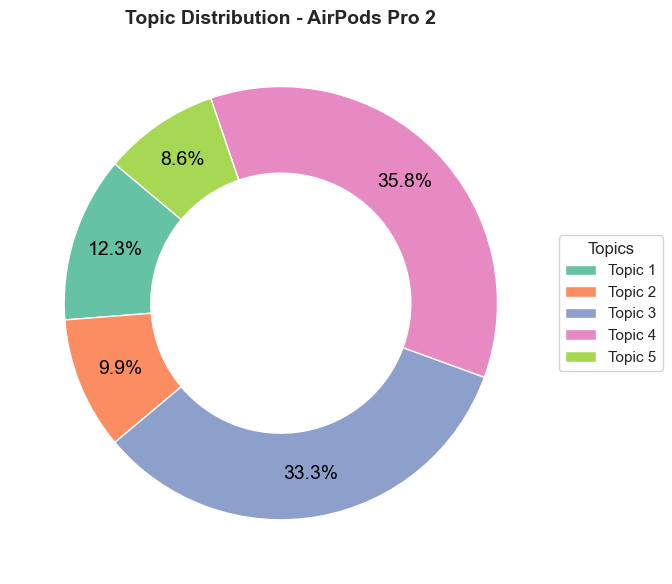

In [ ]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Apply global theme and palette
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Define keywords for "cheap Apple" narrative
keywords_iphone = [
    "cheap", "budget", "cut", "stripped", "lite", "missing", "removed", 
    "limited", "low-end", "entry-level", "value", "overpriced", "compromise"
]

def contains_keywords(text):
    return any(re.search(rf"\b{k}\b", str(text).lower()) for k in keywords_iphone)

iphone_16e["has_keyword"] = iphone_16e["clean_text_analysis"].apply(contains_keywords)

# Filter and clean the text for topic modeling
topic_comments = iphone_16e[
    (iphone_16e["sentiment_label"] == "negative") &
    (iphone_16e["has_keyword"])
]["clean_text_analysis"].dropna()

# Vectorize the comments
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(topic_comments)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract topics
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(f"Topic {idx+1}: " + ", ".join(top_features))
    return topics

# Get feature names and topics
feature_names = vectorizer.get_feature_names_out()
lda_topics = display_topics(lda_model, feature_names)
lda_topics_df = pd.DataFrame({"Topic": [f"Topic {i+1}" for i in range(len(lda_topics))], "Top Words": lda_topics})
display(lda_topics_df.style.set_properties(subset = ['Topic'], **{'Top Words': '400px'}))

# Assign the most probable topic to each comment
topic_assignments = lda_model.transform(doc_term_matrix)
dominant_topic = topic_assignments.argmax(axis=1)

# Add topic column to the original filtered dataframe
topic_comments_df = topic_comments.reset_index(drop=True).to_frame()
topic_comments_df["topic"] = dominant_topic

# Count number of comments per topic
topic_counts = topic_comments_df["topic"].value_counts().sort_index()
topic_labels = [f"Topic {i+1}" for i in topic_counts.index]

fig, ax = plt.subplots(figsize=(12, 6), facecolor='none')
colors = sns.color_palette("Set2", len(topic_counts))

wedges, texts = ax.pie(
    topic_counts.values, startangle=140, colors=colors,
    wedgeprops=dict(width=0.4), labels=None
)

total = sum(topic_counts.values)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = np.cos(np.deg2rad(ang)) * 0.8
    y = np.sin(np.deg2rad(ang)) * 0.8
    percentage = f"{100 * topic_counts.values[i]/total:.1f}%"
    ax.text(x, y, percentage, ha='center', va='center', fontsize=14, color='black')

ax.legend(wedges, topic_labels, title="Topics", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Topic Distribution - iPhone 16e", fontsize=14, weight="bold")
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()

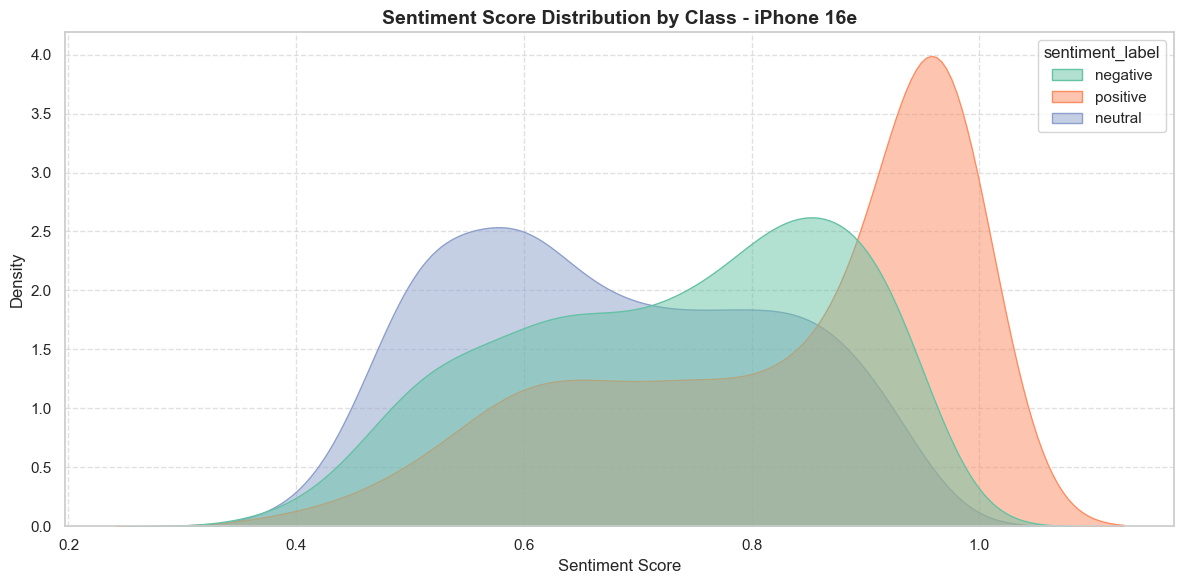

In [3]:
# Sentiment Distribution
plt.figure(figsize=(12, 6), facecolor='none')
sns.kdeplot(data=iphone_16e, x="sentiment_score", hue="sentiment_label", palette="Set2", fill=True, common_norm=False, alpha=0.5)
plt.title("Sentiment Score Distribution by Class - iPhone 16e", fontsize=14, weight="bold")
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(linestyle="--", alpha=0.6)
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()

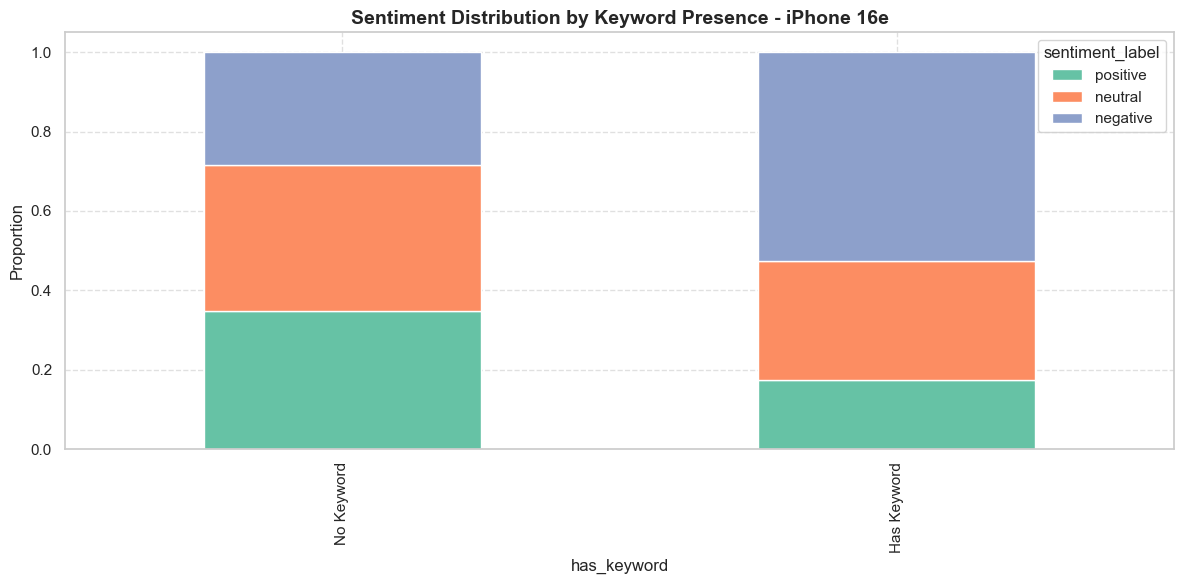

In [4]:
# Boxplot of Sentiment Score by Keyword Presence
sentiment_keyword_table = iphone_16e.groupby("has_keyword")["sentiment_label"].value_counts(normalize=True).unstack().fillna(0)
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)

sentiment_keyword_table[["positive", "neutral", "negative"]].plot(
    kind="bar", stacked=True, ax=ax, color=sns.color_palette("Set2"))

ax.set_title("Sentiment Distribution by Keyword Presence - iPhone 16e", fontsize=14, weight="bold")
ax.set_ylabel("Proportion")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No Keyword", "Has Keyword"])
ax.grid(linestyle="--", alpha=0.6)
ax.set_facecolor('none')
plt.tight_layout()
plt.show()


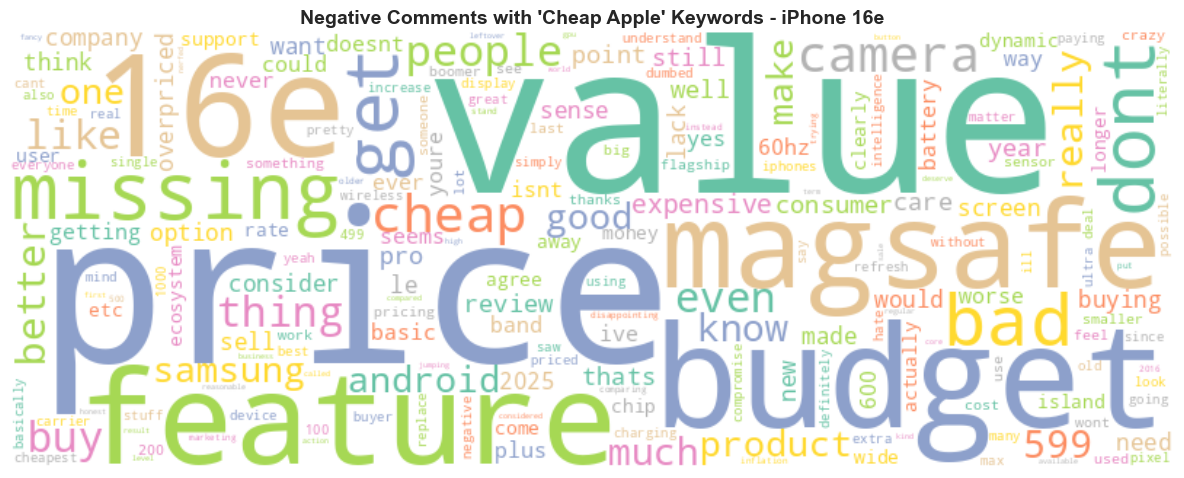

In [5]:
from collections import Counter
from wordcloud import WordCloud

# Convert Set2 palette to a matplotlib colormap
set2_colors = sns.color_palette("Set2", 8).as_hex()

# Create a custom color function
class SimpleGroupedColorFunc(object):
    def __init__(self, colors):
        self.colors = colors
    def __call__(self, word, **kwargs):
        return np.random.choice(self.colors)

color_func = SimpleGroupedColorFunc(set2_colors)

# Filter relevant comments
neg_keyword_comments = iphone_16e[
    (iphone_16e["sentiment_label"] == "negative") &
    (iphone_16e["has_keyword"])
]["clean_text_analysis"].dropna().tolist()

# Generate word frequencies
all_words = " ".join(neg_keyword_comments).split()
word_freq = Counter(all_words)
wordcloud = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(word_freq)

filtered_words = [word for word in all_words if word not in {"iphone", "apple", "phone"}]
filtered_word_freq = Counter(filtered_words)

# Regenerate word cloud
wordcloud_filtered = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(filtered_word_freq)

# Plot the filtered word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_filtered.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Negative Comments with 'Cheap Apple' Keywords - iPhone 16e", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

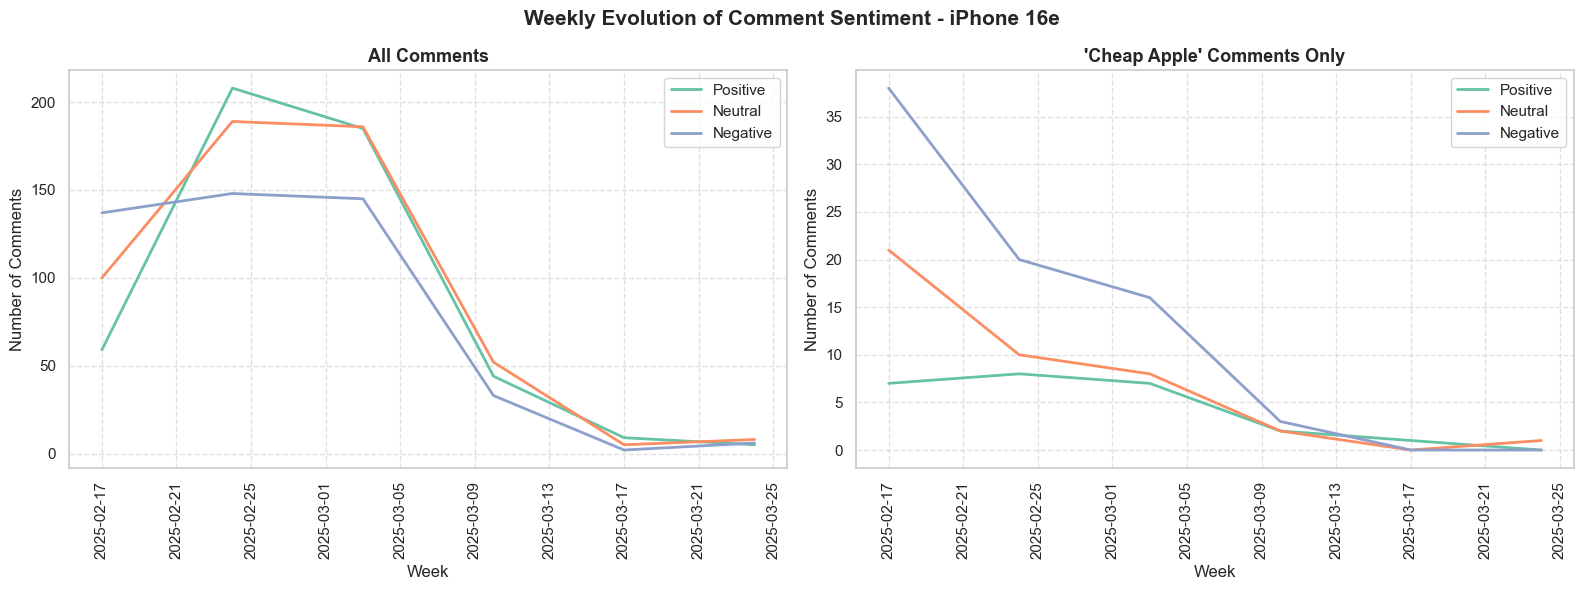

In [6]:
iphone_16e["date"] = pd.to_datetime(iphone_16e["date"], errors='coerce')

# Group by week and sentiment label
weekly_sentiment = (
    iphone_16e.groupby([iphone_16e["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convert period to timestamp
weekly_sentiment["week"] = weekly_sentiment["date"].dt.to_timestamp()

# Filtrar solo comentarios que contienen keywords
keyword_df = iphone_16e[iphone_16e["has_keyword"] == True]

# Agrupar por semana y tipo de sentimiento
weekly_keyword_sentiment = (
    keyword_df.groupby([keyword_df["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convertir periodo a fecha
weekly_keyword_sentiment["week"] = weekly_keyword_sentiment["date"].dt.to_timestamp()

# Create a subplot with 1 row and 2 columns, each with independent y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False, facecolor='none')
sns.set_palette("Set2")

# === Left plot: All comments ===
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[0].set_title("All Comments", fontsize=13, weight="bold")
axes[0].set_xlabel("Week")
axes[0].set_ylabel("Number of Comments")
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].set_facecolor('none')

# === Right plot: Only comments with keywords ===
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[1].set_title("'Cheap Apple' Comments Only", fontsize=13, weight="bold")
axes[1].set_xlabel("Week")
axes[1].set_ylabel("Number of Comments")
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].set_facecolor('none')

# Global title
fig.suptitle("Weekly Evolution of Comment Sentiment - iPhone 16e", fontsize=15, weight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.88) 
plt.show()


### <span style="font-family: Latin Modern Roman; font-size: 23px; font-style: italic"> 3.2 Are the AirPods Pro 2 still the kings of audio… or just an overrated accessory?

,Topic,Top Words
0,Topic 1,"Topic 1: sound, ear, like, good, work, product, problem, people, review, use"
1,Topic 2,"Topic 2: dont, pair, anc, like, think, sound, way, hearing, changing, life"
2,Topic 3,"Topic 3: airpods, pro, ive, problem, dont, work, issue, right, airpod, lol"
3,Topic 4,"Topic 4: sound, apple, pro, better, quality, gen, bud, pair, bought, got"
4,Topic 5,"Topic 5: noise, airpods, ear, pro, mode, cancellation, like, gen, tip, transparency"


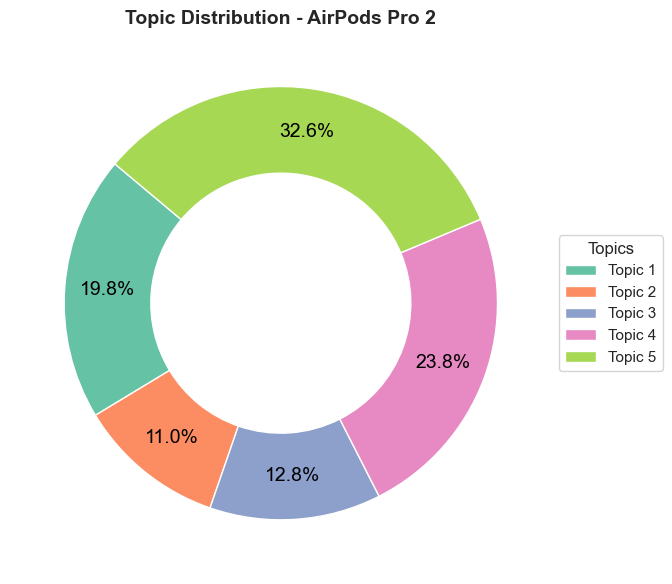

In [7]:
# Define keywords for "cheap Apple" narrative
keywords_airpods = [
    "overpriced", "expensive", "accessory", "problem", "issue", 
    "work", "pair", "sound", "noise", "battery"
]

def contains_keywords(text):
    return any(re.search(rf"\b{k}\b", str(text).lower()) for k in keywords_airpods)

airpods_pro2["has_keyword"] = airpods_pro2["clean_text_analysis"].apply(contains_keywords)

# Filter and clean the text for topic modeling
topic_comments = airpods_pro2[
    (airpods_pro2["sentiment_label"] == "negative") &
    (airpods_pro2["has_keyword"])
]["clean_text_analysis"].dropna()

# Vectorize the comments
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(topic_comments)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract topics
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(f"Topic {idx+1}: " + ", ".join(top_features))
    return topics

# Get feature names and topics
feature_names = vectorizer.get_feature_names_out()
lda_topics = display_topics(lda_model, feature_names)
lda_topics_df = pd.DataFrame({"Topic": [f"Topic {i+1}" for i in range(len(lda_topics))], "Top Words": lda_topics})
display(lda_topics_df.style.set_properties(subset = ['Topic'], **{'Top Words': '400px'}))

# Assign the most probable topic to each comment
topic_assignments = lda_model.transform(doc_term_matrix)
dominant_topic = topic_assignments.argmax(axis=1)

# Add topic column to the original filtered dataframe
topic_comments_df = topic_comments.reset_index(drop=True).to_frame()
topic_comments_df["topic"] = dominant_topic

# Count number of comments per topic
topic_counts = topic_comments_df["topic"].value_counts().sort_index()
topic_labels = [f"Topic {i+1}" for i in topic_counts.index]

fig, ax = plt.subplots(figsize=(12, 6), facecolor='none')
colors = sns.color_palette("Set2", len(topic_counts))

wedges, texts = ax.pie(
    topic_counts.values, startangle=140, colors=colors,
    wedgeprops=dict(width=0.4), labels=None
)

total = sum(topic_counts.values)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = np.cos(np.deg2rad(ang)) * 0.8
    y = np.sin(np.deg2rad(ang)) * 0.8
    percentage = f"{100 * topic_counts.values[i]/total:.1f}%"
    ax.text(x, y, percentage, ha='center', va='center', fontsize=14, color='black')

ax.legend(wedges, topic_labels, title="Topics", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Topic Distribution - AirPods Pro 2", fontsize=14, weight="bold")
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()

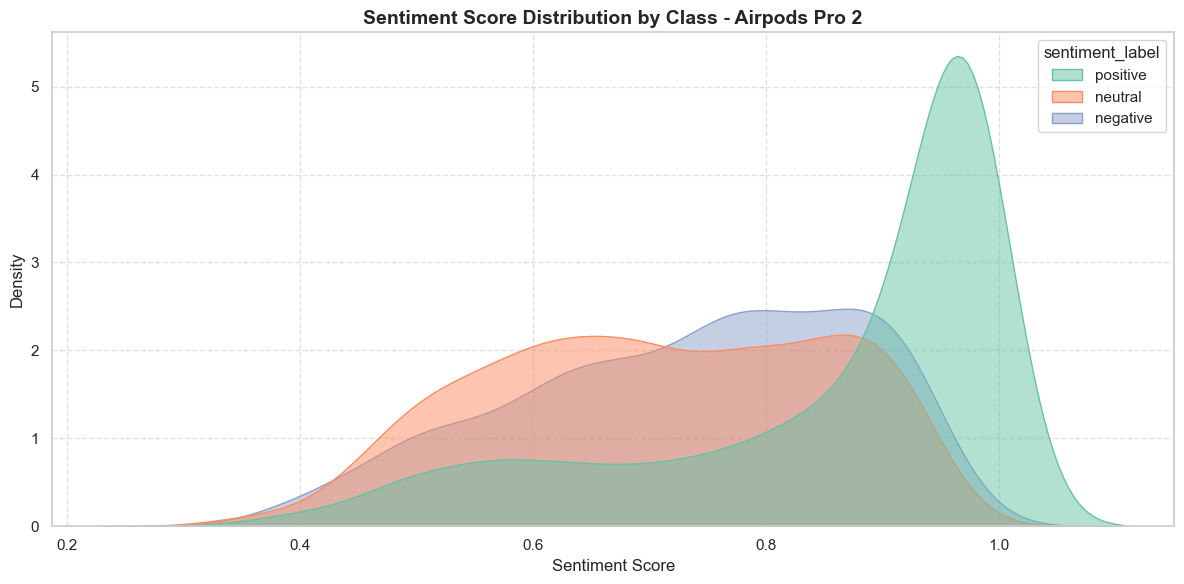

In [8]:
# Sentiment Distribution
plt.figure(figsize=(12, 6), facecolor='none')
sns.kdeplot(data=airpods_pro2, x="sentiment_score", hue="sentiment_label", palette="Set2", fill=True, common_norm=False, alpha=0.5)
plt.title("Sentiment Score Distribution by Class - Airpods Pro 2", fontsize=14, weight="bold")
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(linestyle="--", alpha=0.6)
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()

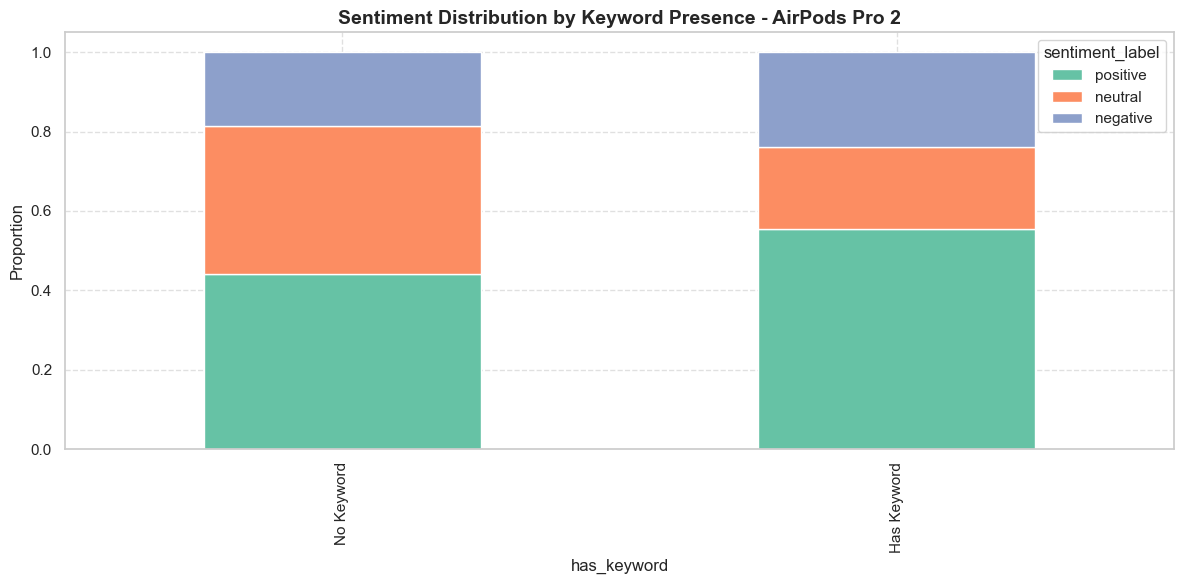

In [9]:
# Boxplot of Sentiment Score by Keyword Presence
sentiment_keyword_table = airpods_pro2.groupby("has_keyword")["sentiment_label"].value_counts(normalize=True).unstack().fillna(0)
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)

sentiment_keyword_table[["positive", "neutral", "negative"]].plot(
    kind="bar", stacked=True, ax=ax, color=sns.color_palette("Set2"))

ax.set_title("Sentiment Distribution by Keyword Presence - AirPods Pro 2", fontsize=14, weight="bold")
ax.set_ylabel("Proportion")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No Keyword", "Has Keyword"])
ax.grid(linestyle="--", alpha=0.6)
ax.set_facecolor('none')
plt.tight_layout()
plt.show()


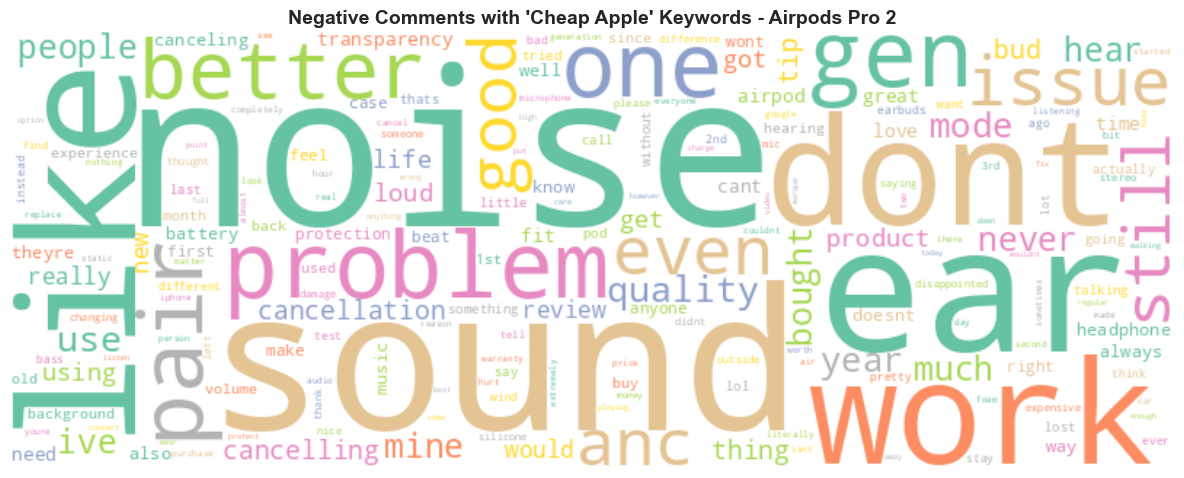

In [10]:
from collections import Counter
from wordcloud import WordCloud

# Convert Set2 palette to a matplotlib colormap
set2_colors = sns.color_palette("Set2", 8).as_hex()

# Create a custom color function
class SimpleGroupedColorFunc(object):
    def __init__(self, colors):
        self.colors = colors
    def __call__(self, word, **kwargs):
        return np.random.choice(self.colors)

color_func = SimpleGroupedColorFunc(set2_colors)

# Filter relevant comments
neg_keyword_comments = airpods_pro2[
    (airpods_pro2["sentiment_label"] == "negative") &
    (airpods_pro2["has_keyword"])
]["clean_text_analysis"].dropna().tolist()

# Generate word frequencies
all_words = " ".join(neg_keyword_comments).split()
word_freq = Counter(all_words)
wordcloud = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(word_freq)

filtered_words = [word for word in all_words if word not in {"airpods", "apple", "phone", "pro"}]
filtered_word_freq = Counter(filtered_words)

# Regenerate word cloud
wordcloud_filtered = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(filtered_word_freq)

# Plot the filtered word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_filtered.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Negative Comments with 'Cheap Apple' Keywords - Airpods Pro 2", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

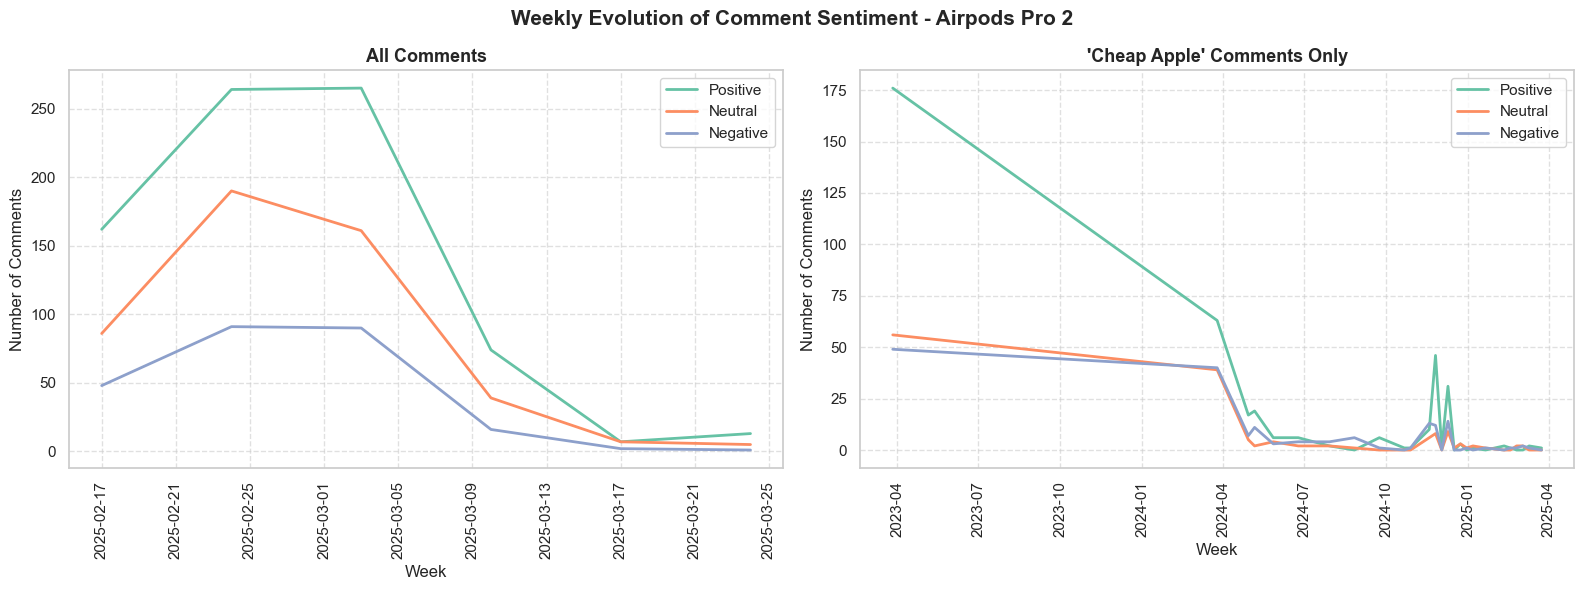

In [11]:
airpods_pro2["date"] = pd.to_datetime(airpods_pro2["date"], errors='coerce')

# Group by week and sentiment label
weekly_sentiment = (
    airpods_pro2.groupby([iphone_16e["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convert period to timestamp
weekly_sentiment["week"] = weekly_sentiment["date"].dt.to_timestamp()

# Filtrar solo comentarios que contienen keywords
keyword_df = airpods_pro2[airpods_pro2["has_keyword"] == True]

# Agrupar por semana y tipo de sentimiento
weekly_keyword_sentiment = (
    keyword_df.groupby([keyword_df["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convertir periodo a fecha
weekly_keyword_sentiment["week"] = weekly_keyword_sentiment["date"].dt.to_timestamp()

# Create a subplot with 1 row and 2 columns, each with independent y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False, facecolor='none')
sns.set_palette("Set2")

# === Left plot: All comments ===
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[0].set_title("All Comments", fontsize=13, weight="bold")
axes[0].set_xlabel("Week")
axes[0].set_ylabel("Number of Comments")
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].set_facecolor('none')

# === Right plot: Only comments with keywords ===
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[1].set_title("'Cheap Apple' Comments Only", fontsize=13, weight="bold")
axes[1].set_xlabel("Week")
axes[1].set_ylabel("Number of Comments")
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].set_facecolor('none')

# Global title
fig.suptitle("Weekly Evolution of Comment Sentiment - Airpods Pro 2", fontsize=15, weight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.88) 
plt.show()

### <span style="font-family: Latin Modern Roman; font-size: 23px; font-style: italic"> 3.3 Is the M3 MacBook Pro stuck in its own perfection?

,Topic,Top Words
0,Topic 1,"Topic 1: max, like, ram, pro, need, base, support, upgrade, thats, laptop"
1,Topic 2,"Topic 2: apple, 8gb, need, make, black, dont, video, ram, like, new"
2,Topic 3,"Topic 3: apple, video, like, 16gb, dont, product, laptop, mbp, use, pro"
3,Topic 4,"Topic 4: apple, upgrade, ram, performance, year, video, intel, great, youre, window"
4,Topic 5,"Topic 5: ram, pro, macbook, 8gb, 16gb, new, price, dont, air, apple"


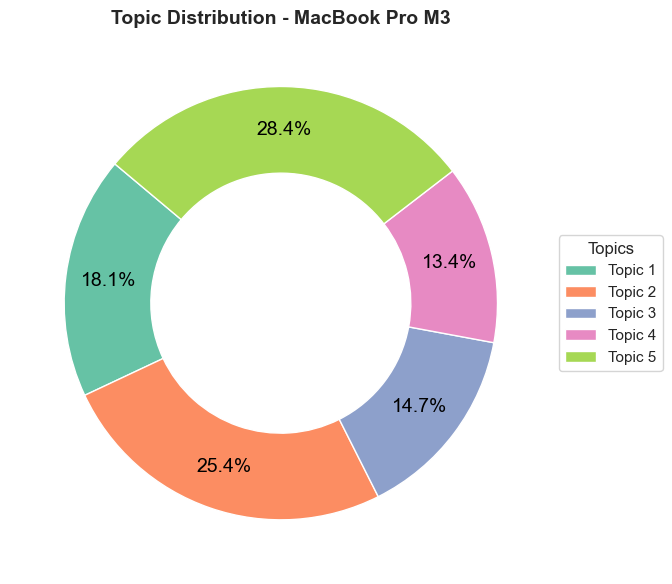

In [14]:
# Define keywords for "cheap Apple" narrative
keywords_macbook = [
    "upgrade", "still", "need", "buy", "ram", "overkill",
    "expensive", "same", "performance", "battery", "fan",
    "design", "black", "chip", "air", "max", "laptop", "video"
]

def contains_keywords(text):
    return any(re.search(rf"\b{k}\b", str(text).lower()) for k in keywords_macbook)

macbook_pro_m3["has_keyword"] = macbook_pro_m3["clean_text_analysis"].apply(contains_keywords)

# Filter and clean the text for topic modeling
topic_comments = macbook_pro_m3[
    (macbook_pro_m3["sentiment_label"] == "negative") &
    (macbook_pro_m3["has_keyword"])
]["clean_text_analysis"].dropna()

# Vectorize the comments
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(topic_comments)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract topics
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(f"Topic {idx+1}: " + ", ".join(top_features))
    return topics

# Get feature names and topics
feature_names = vectorizer.get_feature_names_out()
lda_topics = display_topics(lda_model, feature_names)
lda_topics_df = pd.DataFrame({"Topic": [f"Topic {i+1}" for i in range(len(lda_topics))], "Top Words": lda_topics})
display(lda_topics_df.style.set_properties(subset = ['Topic'], **{'Top Words': '400px'}))

# Assign the most probable topic to each comment
topic_assignments = lda_model.transform(doc_term_matrix)
dominant_topic = topic_assignments.argmax(axis=1)

# Add topic column to the original filtered dataframe
topic_comments_df = topic_comments.reset_index(drop=True).to_frame()
topic_comments_df["topic"] = dominant_topic

# Count number of comments per topic
topic_counts = topic_comments_df["topic"].value_counts().sort_index()
topic_labels = [f"Topic {i+1}" for i in topic_counts.index]

fig, ax = plt.subplots(figsize=(12, 6), facecolor='none')
colors = sns.color_palette("Set2", len(topic_counts))

wedges, texts = ax.pie(
    topic_counts.values, startangle=140, colors=colors,
    wedgeprops=dict(width=0.4), labels=None
)

total = sum(topic_counts.values)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = np.cos(np.deg2rad(ang)) * 0.8
    y = np.sin(np.deg2rad(ang)) * 0.8
    percentage = f"{100 * topic_counts.values[i]/total:.1f}%"
    ax.text(x, y, percentage, ha='center', va='center', fontsize=14, color='black')

ax.legend(wedges, topic_labels, title="Topics", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Topic Distribution - MacBook Pro M3", fontsize=14, weight="bold")
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()

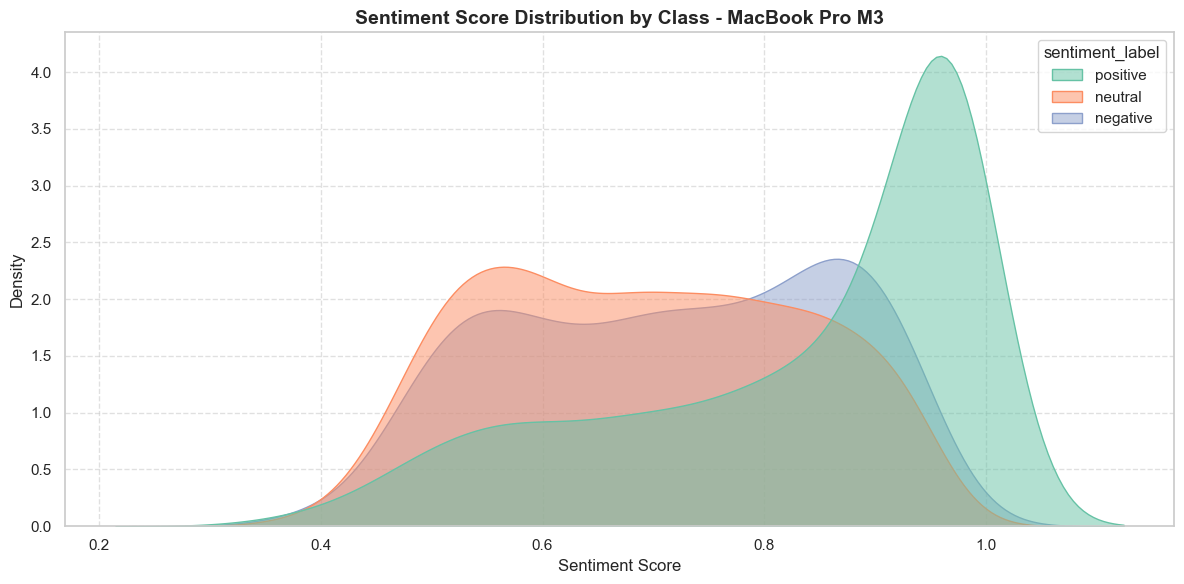

In [16]:
# Sentiment Distribution
plt.figure(figsize=(12, 6), facecolor='none')
sns.kdeplot(data=macbook_pro_m3, x="sentiment_score", hue="sentiment_label", palette="Set2", fill=True, common_norm=False, alpha=0.5)
plt.title("Sentiment Score Distribution by Class - MacBook Pro M3", fontsize=14, weight="bold")
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(linestyle="--", alpha=0.6)
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()

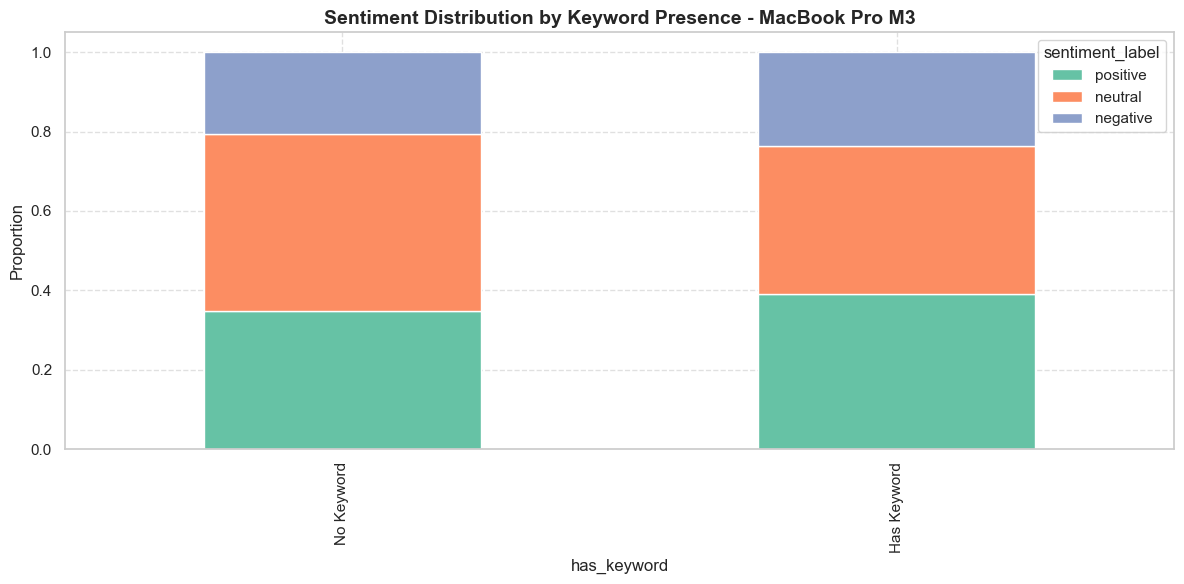

In [19]:
# Boxplot of Sentiment Score by Keyword Presence
sentiment_keyword_table = macbook_pro_m3.groupby("has_keyword")["sentiment_label"].value_counts(normalize=True).unstack().fillna(0)
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)

sentiment_keyword_table[["positive", "neutral", "negative"]].plot(
    kind="bar", stacked=True, ax=ax, color=sns.color_palette("Set2"))

ax.set_title("Sentiment Distribution by Keyword Presence - MacBook Pro M3", fontsize=14, weight="bold")
ax.set_ylabel("Proportion")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No Keyword", "Has Keyword"])
ax.grid(linestyle="--", alpha=0.6)
ax.set_facecolor('none')
plt.tight_layout()
plt.show()


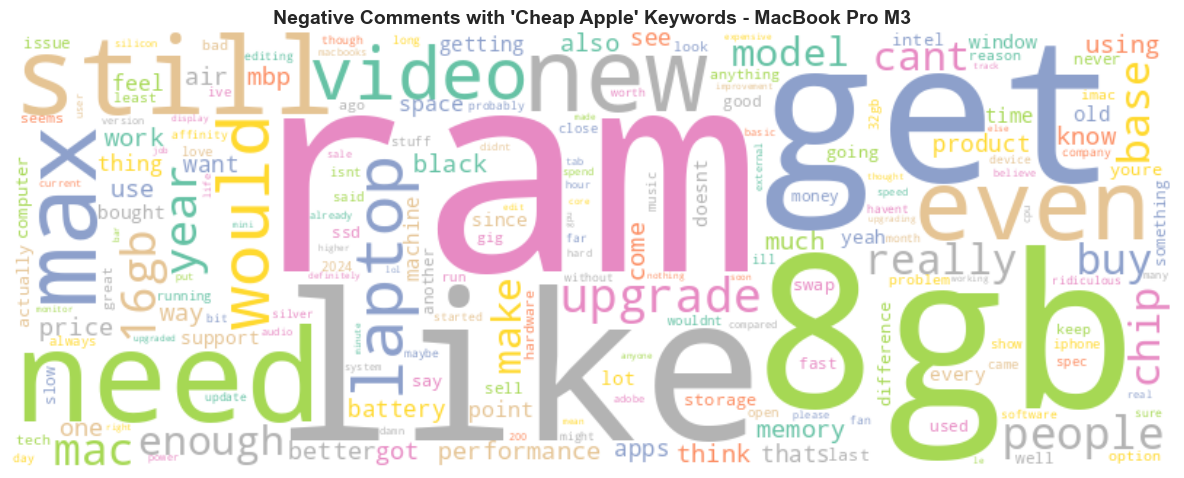

In [24]:
from collections import Counter
from wordcloud import WordCloud

# Convert Set2 palette to a matplotlib colormap
set2_colors = sns.color_palette("Set2", 8).as_hex()

# Create a custom color function
class SimpleGroupedColorFunc(object):
    def __init__(self, colors):
        self.colors = colors
    def __call__(self, word, **kwargs):
        return np.random.choice(self.colors)

color_func = SimpleGroupedColorFunc(set2_colors)

# Filter relevant comments
neg_keyword_comments = macbook_pro_m3[
    (macbook_pro_m3["sentiment_label"] == "negative") &
    (macbook_pro_m3["has_keyword"])
]["clean_text_analysis"].dropna().tolist()

# Generate word frequencies
all_words = " ".join(neg_keyword_comments).split()
word_freq = Counter(all_words)
wordcloud = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(word_freq)

filtered_words = [word for word in all_words if word not in {"macbook", "apple", "pro", "dont"}]
filtered_word_freq = Counter(filtered_words)

# Regenerate word cloud
wordcloud_filtered = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(filtered_word_freq)

# Plot the filtered word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_filtered.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Negative Comments with 'Cheap Apple' Keywords - MacBook Pro M3", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

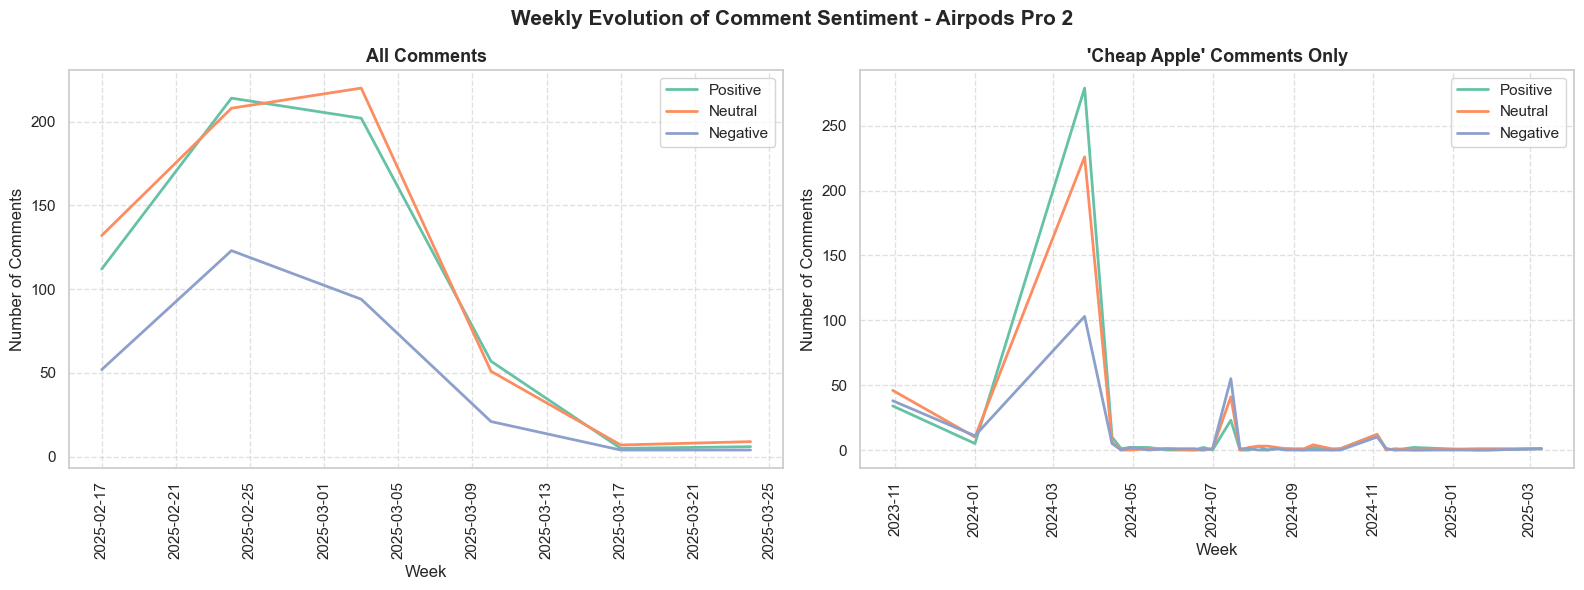

In [25]:
macbook_pro_m3["date"] = pd.to_datetime(macbook_pro_m3["date"], errors='coerce')

# Group by week and sentiment label
weekly_sentiment = (
    macbook_pro_m3.groupby([iphone_16e["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convert period to timestamp
weekly_sentiment["week"] = weekly_sentiment["date"].dt.to_timestamp()

# Filtrar solo comentarios que contienen keywords
keyword_df = macbook_pro_m3[macbook_pro_m3["has_keyword"] == True]

# Agrupar por semana y tipo de sentimiento
weekly_keyword_sentiment = (
    keyword_df.groupby([keyword_df["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convertir periodo a fecha
weekly_keyword_sentiment["week"] = weekly_keyword_sentiment["date"].dt.to_timestamp()

# Create a subplot with 1 row and 2 columns, each with independent y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False, facecolor='none')
sns.set_palette("Set2")

# === Left plot: All comments ===
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[0].set_title("All Comments", fontsize=13, weight="bold")
axes[0].set_xlabel("Week")
axes[0].set_ylabel("Number of Comments")
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].set_facecolor('none')

# === Right plot: Only comments with keywords ===
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[1].set_title("'Cheap Apple' Comments Only", fontsize=13, weight="bold")
axes[1].set_xlabel("Week")
axes[1].set_ylabel("Number of Comments")
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].set_facecolor('none')

# Global title
fig.suptitle("Weekly Evolution of Comment Sentiment - Airpods Pro 2", fontsize=15, weight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.88) 
plt.show()

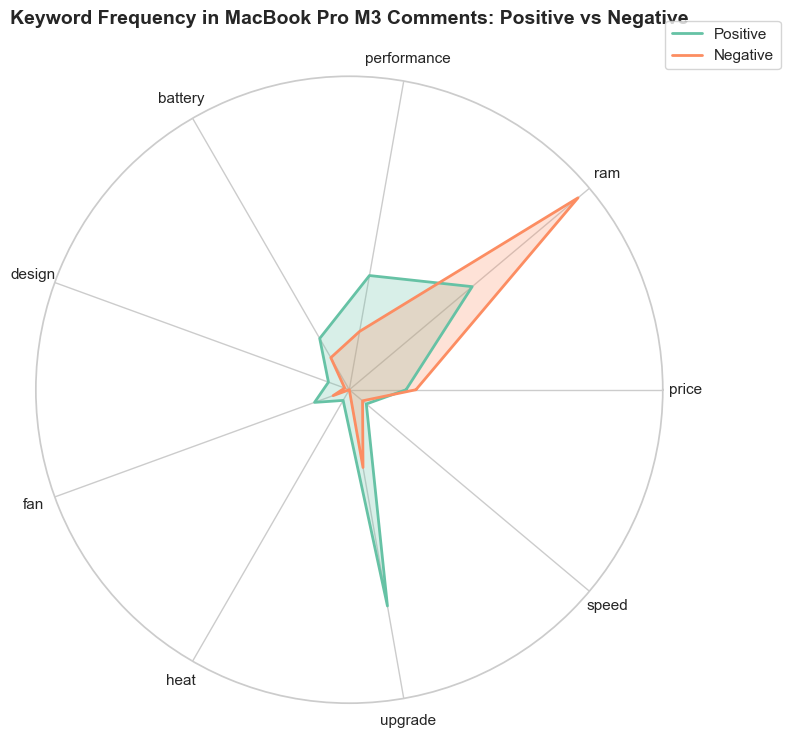

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from math import pi

# Palabras clave finales
keywords_radar = ['price', 'ram', 'performance', 'battery', 'design', 'fan', 'heat', 'upgrade', 'speed']

# Filtramos texto limpio por tipo de sentimiento
pos_comments = macbook_pro_m3[macbook_pro_m3["sentiment_label"] == "positive"]["clean_text_analysis"].dropna().tolist()
neg_comments = macbook_pro_m3[macbook_pro_m3["sentiment_label"] == "negative"]["clean_text_analysis"].dropna().tolist()

# Convertimos todo el texto a palabras y contamos su frecuencia
pos_words = " ".join(pos_comments).split()
neg_words = " ".join(neg_comments).split()

pos_freq = Counter(pos_words)
neg_freq = Counter(neg_words)

# Extraer las frecuencias solo para las keywords seleccionadas
pos_values = [pos_freq.get(word, 0) for word in keywords_radar]
neg_values = [neg_freq.get(word, 0) for word in keywords_radar]

# Normalizamos los valores para mejor comparación
max_val = max(max(pos_values), max(neg_values), 1)
pos_values = [v / max_val for v in pos_values]
neg_values = [v / max_val for v in neg_values]

# Radar chart setup
labels = keywords_radar
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]
pos_values += pos_values[:1]
neg_values += neg_values[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True), facecolor='none')

# Plot positive
ax.plot(angles, pos_values, linewidth=2, linestyle='solid', label='Positive')
ax.fill(angles, pos_values, alpha=0.25)

# Plot negative
ax.plot(angles, neg_values, linewidth=2, linestyle='solid', label='Negative')
ax.fill(angles, neg_values, alpha=0.25)

# Configuración de ejes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11)
ax.set_yticks([])
ax.set_title("Keyword Frequency in MacBook Pro M3 Comments: Positive vs Negative", fontsize=14, weight="bold", pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 25px;"> Elena Conderana Medem y Sergio Cuenca Núñez </span>